In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
info = pd.read_excel("../../1_analysis_of_rna_seq/RNAseq.xls")
info = info[~info["Replicate"].isna()]
info.head()

,Sample,Tissue,Replicate,Stage,Sex
0,Ju_Br_Mi_1,Brain,1.0,Juvenile,Mixture
1,Ju_Br_Mi_2,Brain,2.0,Juvenile,Mixture
3,Ad_Br_Ma_2,Brain,1.0,Adult,Male
5,Ad_Br_Ma_4,Brain,2.0,Adult,Male
8,Ad_Br_Fe_3,Brain,1.0,Adult,Female


# DEGs between sex

Brain 200 825
Eye 124 158
Gill 137 120
Gonad 5297 6344
Heart 416 312
Intestine 53 25
Kidney 25 30
Liver 152 83
Muscle 344 870
Pituitary 192 189
Spleen 143 200
Stomach 117 180


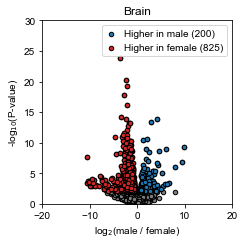

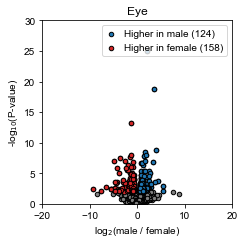

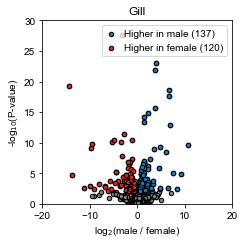

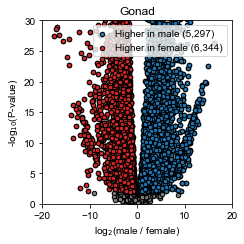

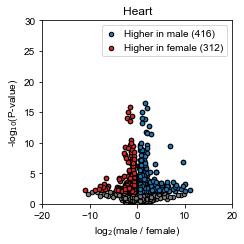

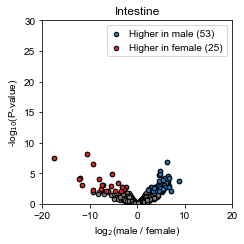

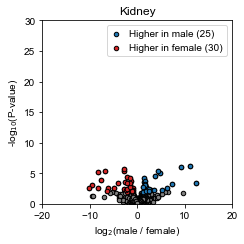

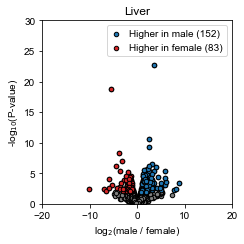

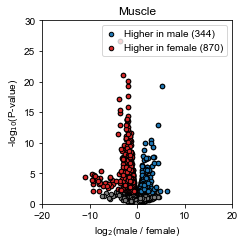

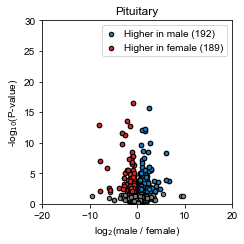

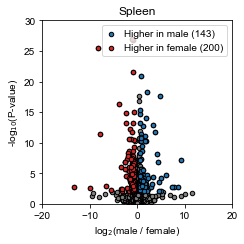

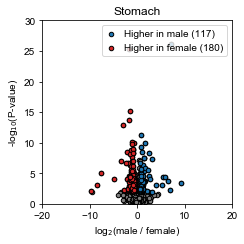

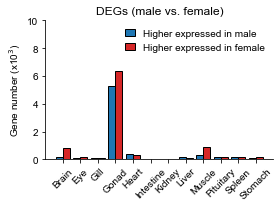

In [4]:
tissues = list(sorted(set(info[info["Sex"] == "Male"]["Tissue"])))

rows = []
for t in tissues:
    group1 = "Ad_%s_Fe" % t[:2]
    group2 = "Ad_%s_Ma" % t[:2]
    path = "../../3_integrate_isoforms/results/expression/deseq2/stat/%s/%s.tsv" % (group1, group2)
    dat = pd.read_csv(path, sep="\t")
    dat = dat[dat["baseMean"] >= 50]
    xs = dat["log2FoldChange"]
    ys = -np.log10(dat["pvalue"])
    xlim = xs.abs().max() * 1.2
    pvalue_cutoff = 0.01
    fc_cutoff = 1.5

    flags1 = (xs > np.log2(fc_cutoff)) & (ys > -np.log10(pvalue_cutoff)) # up
    flags2 = (xs < -np.log2(fc_cutoff)) & (ys > -np.log10(pvalue_cutoff)) # down
    n1 = sum(flags1)
    n2 = sum(flags2)
    print(t, sum(flags1), sum(flags2))
    rows.append([t, n1, n2])
    if True:
        xs1, ys1 = xs[flags1], ys[flags1]
        xs2, ys2 = xs[flags2], ys[flags2]
        plt.figure(figsize=(3.5, 3.5))
        plt.title(t)
        plt.scatter(xs, ys, marker="o", s=20, lw=1, edgecolor="black", color="grey")
        plt.scatter(xs1, ys1, marker="o", s=20, lw=1, edgecolor="black", color="C0", label="Higher in male (%s)" % format(len(xs1), ","))
        plt.scatter(xs2, ys2, marker="o", s=20, lw=1, edgecolor="black", color="C3", label="Higher in female (%s)" % format(len(xs2), ","))
        plt.xlim(-20, 20)
        plt.ylim(0, 30)
        plt.xlabel("log$_2$(male / female)")
        plt.ylabel("-log$_{10}$(P-value)")
        plt.legend(handlelength=1)
        plt.tight_layout()
        plt.savefig("figures/sex_deg_scatter.%s.pdf" % t, dpi=300)
        
d = pd.DataFrame(rows, columns=["Tissue", "Up", "Down"])
xs = np.arange(len(d))
w = 0.4
plt.figure(figsize=(4, 3))
plt.title("DEGs (male vs. female)")
plt.bar(xs - w/2, d["Up"]/1e3, edgecolor="black", width=w, color="C0", label="Higher expressed in male")
plt.bar(xs + w/2, d["Down"]/1e3, edgecolor="black", width=w, color="C3", label="Higher expressed in female")
plt.xticks(xs, d["Tissue"], rotation=45)
plt.yticks(np.arange(0, 10 + 1, 2))
plt.ylabel("Gene number (x10$^3$)")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(handlelength=1,frameon=False, loc="upper right", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("figures/sex_degs_bar.pdf", dpi=300)

# DEGs between stage

['Brain', 'Eye', 'Gill', 'Gonad', 'Heart', 'Intestine', 'Kidney', 'Liver', 'Muscle']
Brain 1587 2116
Eye 486 1226
Gill 1451 1659
Gonad 4775 4727


/home/chenzonggui/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Heart 2337 2455
Intestine 357 361
Kidney 1565 1130
Liver 657 932
Muscle 1403 2394
Brain 1926 1914
Eye 1433 2496
Gill 1221 1402
Gonad 7213 6192
Heart 1627 1706
Intestine 134 201
Kidney 1038 804
Liver 1133 1665
Muscle 2388 2934


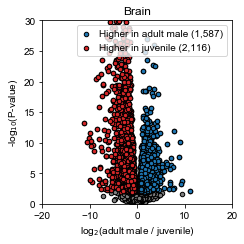

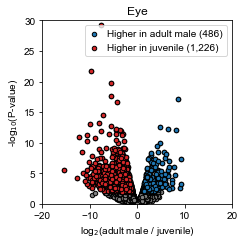

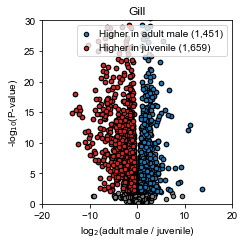

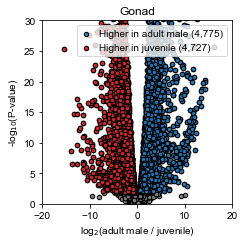

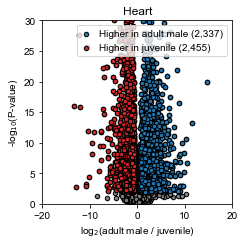

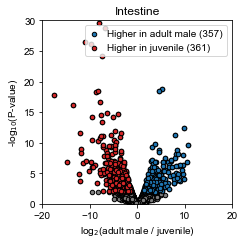

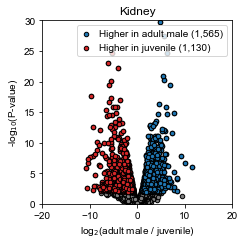

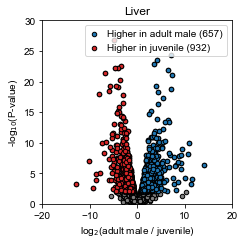

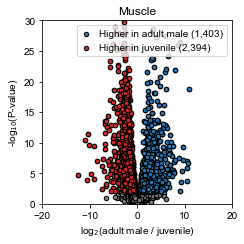

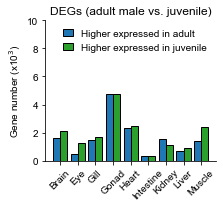

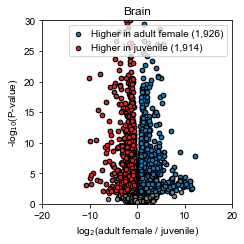

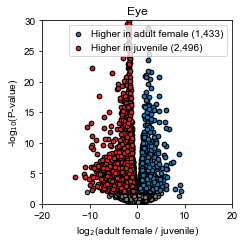

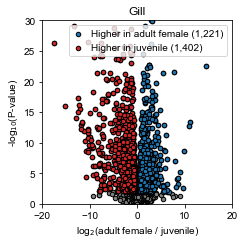

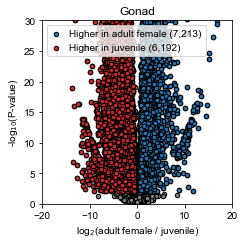

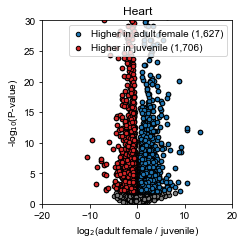

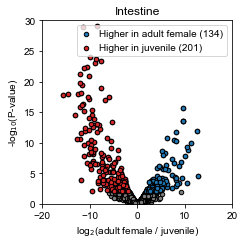

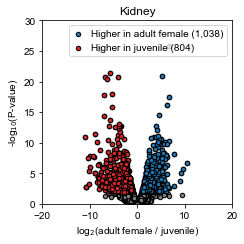

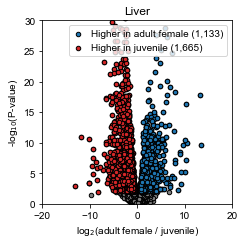

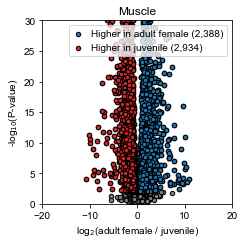

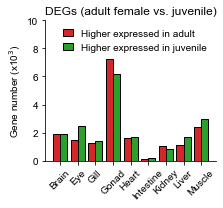

In [3]:
tissues = list(sorted(set(info[info["Sex"] == "Mixture"]["Tissue"])))
print(tissues)

for sex in ["Ma", "Fe"]:
    rows = []
    for t in tissues:
        group1 = "Ju_%s_Mi" % t[:2]
        group2 = "Ad_%s_%s" % (t[:2], sex)

        path = "../../3_integrate_isoforms/results/expression/deseq2/stat/%s/%s.tsv" % (group1, group2)
        dat = pd.read_csv(path, sep="\t")
        dat = dat[dat["baseMean"] >= 50]

        xs = dat["log2FoldChange"]
        ys = -np.log10(dat["pvalue"])

        xlim = xs.abs().max() * 1.2

        pvalue_cutoff = 0.01
        fc_cutoff = 1.5

        flags1 = (xs > np.log2(fc_cutoff)) & (ys > -np.log10(pvalue_cutoff)) # up
        flags2 = (xs < -np.log2(fc_cutoff)) & (ys > -np.log10(pvalue_cutoff)) # down

        n1 = sum(flags1)
        n2 = sum(flags2)
        print(t, sum(flags1), sum(flags2))
        rows.append([t, n1, n2])
        
        if True:
            xs1, ys1 = xs[flags1], ys[flags1]
            xs2, ys2 = xs[flags2], ys[flags2]

            plt.figure(figsize=(3.5, 3.5))
            plt.title(t)
            plt.scatter(xs, ys, marker="o", s=20, lw=1, edgecolor="black", color="grey")
            plt.scatter(xs1, ys1, marker="o", s=20, lw=1, edgecolor="black", color="C0", label="Higher in adult %s (%s)" % ("male" if sex == "Ma" else "female", format(len(xs1), ",")))
            plt.scatter(xs2, ys2, marker="o", s=20, lw=1, edgecolor="black", color="C3", label="Higher in juvenile (%s)" % format(len(xs2), ","))
            plt.xlim(-20, 20)
            plt.ylim(0, 30)
            plt.xlabel("log$_2$(adult %s / juvenile)" % ("male" if sex == "Ma" else "female"))
            plt.ylabel("-log$_{10}$(P-value)")
            plt.legend(handlelength=1)

            plt.tight_layout()
            plt.savefig("figures/stage_deg_scatter.%s.%s.pdf" % (sex, t), dpi=300)
            
    d = pd.DataFrame(rows, columns=["Tissue", "Up", "Down"])
    
    xs = np.arange(len(d))
    w = 0.4

    plt.figure(figsize=(3.2, 3))
    plt.title("DEGs (adult %s vs. juvenile)" % ("male" if sex == "Ma" else "female"))
    plt.bar(xs - w/2, d["Up"]/1e3, edgecolor="black", width=w, color="C0" if sex == "Ma" else "C3", label="Higher expressed in adult")
    plt.bar(xs + w/2, d["Down"]/1e3, edgecolor="black", width=w, color="C2", label="Higher expressed in juvenile")
    plt.xticks(xs, d["Tissue"], rotation=45)
    plt.yticks(np.arange(0, 11, 2))
    plt.ylabel("Gene number (x10$^3$)")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.legend(handlelength=1, frameon=False, loc="upper right", bbox_to_anchor=(1, 1))
    plt.tight_layout()

    plt.savefig("figures/stage_degs_bar.%s.pdf" % sex, dpi=300)